In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import os

In [2]:
curr_directory = "/scratch/zhivar/robust-prototype-learning"

In [3]:
with open(
    os.path.join(
        curr_directory, "PBN_transformer", "all_results_from_pbn_models_static.json"
    )
) as f:
    pbns_data = json.load(f)
    f.close()

In [4]:
with open(
    os.path.join(
        curr_directory, "normal_models", "all_results_from_non_pbn_models_static.json"
    )
) as f:
    non_pbns_data = json.load(f)
    f.close()

In [5]:
with open(
    os.path.join(
        curr_directory,
        "normal_models",
        "all_results_from_non_pbn_models_static_augmented_training.json",
    )
) as f:
    non_pbns_data_augmented = json.load(f)
    f.close()

In [6]:
all_comments = []
all_architectures = []
all_datasets = []
all_attack_types = []
all_p1_lambs = []
all_p2_lambs = []
all_p3_lambs = []
all_num_protos = []
all_conditions = []
all_accs = []
for item in pbns_data:
    test_accuracy = item["results"]["test"][f"test_{item['attack_type']}"]["accuracy"]
    if test_accuracy < 0.5:
        continue
    for condition in ["test", "adv"]:
        all_comments.append("PBN")
        all_architectures.append(item["architecture"])
        all_datasets.append(item["dataset"])
        all_attack_types.append(item["attack_type"])
        all_p1_lambs.append(item["p1_lamb"])
        all_p2_lambs.append(item["p2_lamb"])
        all_p3_lambs.append(item["p3_lamb"])
        all_num_protos.append(item["num_proto"])
        all_conditions.append(condition)
        all_accs.append(
            item["results"][condition][f"{condition}_{item['attack_type']}"]["accuracy"]
        )
pbns_data_df = pd.DataFrame(
    {
        "comment": all_comments,
        "architecture": all_architectures,
        "dataset": all_datasets,
        "attack_type": all_attack_types,
        "p1_lamb": all_p1_lambs,
        "p2_lamb": all_p2_lambs,
        "p3_lamb": all_p3_lambs,
        "num_protos": all_num_protos,
        "condition": all_conditions,
        "accuracy": all_accs,
    }
)
pbns_data_df.head(3)

,comment,architecture,dataset,attack_type,p1_lamb,p2_lamb,p3_lamb,num_protos,condition,accuracy
0,PBN,BART,dbpedia,pwws,0.0,0.0,0.0,4,test,0.766595
1,PBN,BART,dbpedia,pwws,0.0,0.0,0.0,4,adv,0.478944
2,PBN,BART,dbpedia,pwws,0.0,0.0,0.9,8,test,0.942184


In [7]:
def get_architecture_from_full_name(checkpoint):
    if "bart" in checkpoint.lower():
        return "BART"
    elif "electra" in checkpoint.lower():
        return "ELECTRA"
    elif "bert" in checkpoint.lower():
        return "BERT"
    else:
        raise ValueError("Unknown architecture")

In [8]:
all_comments = []
all_architectures = []
all_datasets = []
all_attack_types = []
all_conditions = []
all_accs = []
for item in non_pbns_data:
    test_accuracy = item["results"]["test"][f"test_{item['attack_type']}"][
        "eval_accuracy"
    ]
    if test_accuracy < 0.5:
        continue
    for condition in ["test", "adv"]:
        all_comments.append("non_PBN")
        all_architectures.append(get_architecture_from_full_name(item["architecture"]))
        all_datasets.append(item["dataset"])
        all_attack_types.append(item["attack_type"])
        all_conditions.append(condition)
        all_accs.append(
            item["results"][condition][f"{condition}_{item['attack_type']}"][
                "eval_accuracy"
            ]
        )
non_pbns_data_df = pd.DataFrame(
    {
        "comment": all_comments,
        "architecture": all_architectures,
        "dataset": all_datasets,
        "attack_type": all_attack_types,
        "condition": all_conditions,
        "accuracy": all_accs,
    }
)
non_pbns_data_df.head(3)

,comment,architecture,dataset,attack_type,condition,accuracy
0,non_PBN,BART,dbpedia,textfooler,test,0.986928
1,non_PBN,BART,dbpedia,textfooler,adv,0.712963
2,non_PBN,BART,dbpedia,textbugger,test,0.960187


In [9]:
all_comments = []
all_architectures = []
all_datasets = []
all_attack_types = []
all_conditions = []
all_accs = []
for item in non_pbns_data_augmented:
    test_accuracy = item["results"]["test"]["eval_accuracy"]
    if test_accuracy < 0.5:
        continue

    all_comments.append("non_PBN_augmented")
    all_architectures.append(get_architecture_from_full_name(item["architecture"]))
    all_datasets.append(item["dataset"])
    all_attack_types.append(item["attack_type"])
    all_conditions.append("adv")
    all_accs.append(item["results"]["test"]["eval_accuracy"])
non_pbns_data_augmented_df = pd.DataFrame(
    {
        "comment": all_comments,
        "architecture": all_architectures,
        "dataset": all_datasets,
        "attack_type": all_attack_types,
        "condition": all_conditions,
        "accuracy": all_accs,
    }
)
non_pbns_data_augmented_df.head(3)

,comment,architecture,dataset,attack_type,condition,accuracy
0,non_PBN_augmented,BART,dbpedia,textfooler,adv,0.939759
1,non_PBN_augmented,BART,dbpedia,textbugger,adv,0.887931
2,non_PBN_augmented,BART,dbpedia,deepwordbug,adv,0.796117


In [10]:
sub_df = non_pbns_data_df[non_pbns_data_df["condition"] == "test"].copy()
sub_df["comment"] = "non_PBN_augmented"
sub_df = sub_df[sub_df["dataset"] != "sst2"]
non_pbns_data_augmented_df["condition"] = "adv"
non_pbns_data_augmented_df = pd.concat([non_pbns_data_augmented_df, sub_df])
non_pbns_data_augmented_df.head(3)

,comment,architecture,dataset,attack_type,condition,accuracy
0,non_PBN_augmented,BART,dbpedia,textfooler,adv,0.939759
1,non_PBN_augmented,BART,dbpedia,textbugger,adv,0.887931
2,non_PBN_augmented,BART,dbpedia,deepwordbug,adv,0.796117


In [11]:
non_pbns_data_augmented_df.shape, non_pbns_data_df.shape, pbns_data_df.shape

((90, 6), (96, 6), (1444, 10))

# comparing the PBN with non PBN

In [12]:
pbns_data_df_summary = (
    pbns_data_df.groupby(["comment", "architecture", "dataset", "attack_type"])
    .apply(
        lambda x: pd.Series(
            {
                "adv": x[x["condition"] == "adv"]["accuracy"].max(),
                "test": x[x["condition"] == "test"]["accuracy"].max(),
                "difference": x[x["condition"] == "adv"]["accuracy"].max()
                - x[x["condition"] == "test"]["accuracy"].max(),
            }
        )
    )
    .reset_index()
)

non_pbns_data_df_summary = (
    non_pbns_data_df.groupby(["comment", "architecture", "dataset", "attack_type"])
    .apply(
        lambda x: pd.Series(
            {
                "adv": x[x["condition"] == "adv"]["accuracy"].mean(),
                "test": x[x["condition"] == "test"]["accuracy"].mean(),
                "difference": x[x["condition"] == "adv"]["accuracy"].mean()
                - x[x["condition"] == "test"]["accuracy"].mean(),
            }
        )
    )
    .reset_index()
)

merged_df = pd.merge(
    pbns_data_df_summary,
    non_pbns_data_df_summary,
    on=["architecture", "dataset", "attack_type"],
    how="inner",
    suffixes=("_pbn", "_non_pbn"),
)

print(
    "ratio that adv_pbn is higher than test_pbn using the best hyperparameters",
    (merged_df["adv_pbn"] > merged_df["adv_non_pbn"]).sum() / merged_df.shape[0],
)

# same analysis per dataset
for dataset in merged_df["dataset"].unique():
    dataset_results = merged_df[merged_df["dataset"] == dataset]
    print(
        f"ratio that adv_pbn is higher than test_pbn using the best hyperparameters for {dataset}",
        (dataset_results["adv_pbn"] > dataset_results["adv_non_pbn"]).sum()
        / dataset_results.shape[0],
    )

ratio that adv_pbn is higher than test_pbn using the best hyperparameters 0.9375
ratio that adv_pbn is higher than test_pbn using the best hyperparameters for ag_news 1.0
ratio that adv_pbn is higher than test_pbn using the best hyperparameters for dbpedia 0.8666666666666667
ratio that adv_pbn is higher than test_pbn using the best hyperparameters for imdb 0.9333333333333333
ratio that adv_pbn is higher than test_pbn using the best hyperparameters for sst2 1.0


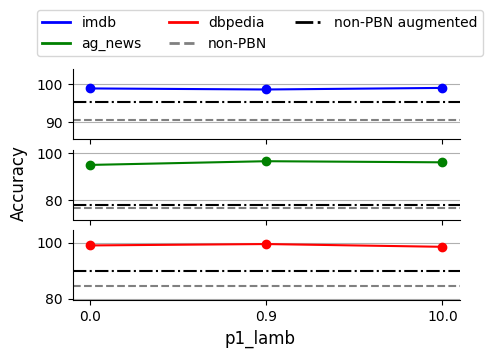

In [13]:
fig, axs = plt.subplots(3, 1, figsize=(5, 3), sharex=True)
dataset_to_colors = {
    "imdb": "blue",
    "ag_news": "green",
    "dbpedia": "red",
}
for ax, dataset in zip(axs, ["imdb", "ag_news", "dbpedia", "sst2"]):
    sub_df = pbns_data_df[pbns_data_df["dataset"] == dataset]
    results = sub_df.groupby("p1_lamb")["accuracy"].max()
    non_pbn_baseline = (
        non_pbns_data_df[(non_pbns_data_df["dataset"] == dataset)]["accuracy"].mean()
        * 100
    )
    non_pbn_augmented_baseline = (
        non_pbns_data_augmented_df[
            (non_pbns_data_augmented_df["dataset"] == dataset)
            & (non_pbns_data_augmented_df["condition"] == "adv")
        ]["accuracy"].mean()
        * 100
        + 5
    )

    x = results.index
    y = results.values * 100
    x_to_y = dict(zip(x, y))

    correct_indices = [0.0, 0.9, 10.0]

    ax.plot(
        range(len(correct_indices)),
        [x_to_y.get(i, non_pbn_baseline + 5) for i in correct_indices],
        label=dataset,
        color=dataset_to_colors[dataset],
        marker="o",
    )

    ax.axhline(
        y=non_pbn_baseline,
        color="grey",
        linestyle="--",
        label="non-PBN",
    )
    ax.axhline(
        y=non_pbn_augmented_baseline,
        color="black",
        linestyle="-.",
        label="non-PBN augmented",
    )

    ax.set_ylim(
        min(min(y), non_pbn_baseline, non_pbn_augmented_baseline) - 5,
        max(max(y), non_pbn_baseline, non_pbn_augmented_baseline) + 5,
    )
    ax.grid(axis="y")
    ax.set_xticks(range(len(correct_indices)))
    ax.set_xticklabels(correct_indices)


for ax in axs:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)


# make handles and labels for imdb, ag_news, dbpedia with colors and solid lines
# make handles and labels for non-pbn, non-pbn-augmented with black and grey and dashed lines
# so total 5 handles and labels
imdb_patch = plt.Line2D([0], [0], color=dataset_to_colors["imdb"], lw=2)
ag_news_patch = plt.Line2D([0], [0], color=dataset_to_colors["ag_news"], lw=2)
dbpedia_patch = plt.Line2D([0], [0], color=dataset_to_colors["dbpedia"], lw=2)
non_pbn_patch = plt.Line2D([0], [0], color="grey", lw=2, linestyle="--")
non_pbn_augmented_patch = plt.Line2D([0], [0], color="black", lw=2, linestyle="-.")
handles = [
    imdb_patch,
    ag_news_patch,
    dbpedia_patch,
    non_pbn_patch,
    non_pbn_augmented_patch,
]
labels = ["imdb", "ag_news", "dbpedia", "non-PBN", "non-PBN augmented"]
fig.legend(handles, labels, loc="upper center", ncol=3, bbox_to_anchor=(0.5, 1.1))


fig.supxlabel("p1_lamb", y=-0.05, ha="center")
fig.supylabel("Accuracy", x=0.0, ha="left")


fig.subplots_adjust(hspace=0.15)
plt.show()

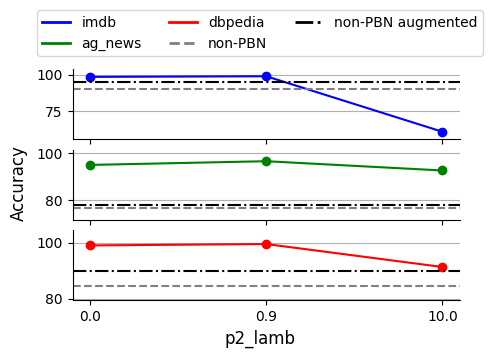

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(5, 3), sharex=True)
dataset_to_colors = {
    "imdb": "blue",
    "ag_news": "green",
    "dbpedia": "red",
}
for ax, dataset in zip(axs, ["imdb", "ag_news", "dbpedia", "sst2"]):
    sub_df = pbns_data_df[pbns_data_df["dataset"] == dataset]
    results = sub_df.groupby("p2_lamb")["accuracy"].max()
    non_pbn_baseline = (
        non_pbns_data_df[(non_pbns_data_df["dataset"] == dataset)]["accuracy"].mean()
        * 100
    )
    non_pbn_augmented_baseline = (
        non_pbns_data_augmented_df[
            (non_pbns_data_augmented_df["dataset"] == dataset)
            & (non_pbns_data_augmented_df["condition"] == "adv")
        ]["accuracy"].mean()
        * 100
        + 5
    )

    x = results.index
    y = results.values * 100
    x_to_y = dict(zip(x, y))

    correct_indices = [0.0, 0.9, 10.0]

    ax.plot(
        range(len(correct_indices)),
        [x_to_y.get(i, non_pbn_baseline + 5) for i in correct_indices],
        label=dataset,
        color=dataset_to_colors[dataset],
        marker="o",
    )

    ax.axhline(
        y=non_pbn_baseline,
        color="grey",
        linestyle="--",
        label="non-PBN",
    )

    ax.axhline(
        y=non_pbn_augmented_baseline,
        color="black",
        linestyle="-.",
        label="non-PBN augmented",
    )

    ax.set_ylim(
        min(min(y), non_pbn_baseline, non_pbn_augmented_baseline) - 5,
        max(max(y), non_pbn_baseline, non_pbn_augmented_baseline) + 5,
    )
    ax.grid(axis="y")
    ax.set_xticks(range(len(correct_indices)))
    ax.set_xticklabels(correct_indices)


for ax in axs:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)


imdb_patch = plt.Line2D([0], [0], color=dataset_to_colors["imdb"], lw=2)
ag_news_patch = plt.Line2D([0], [0], color=dataset_to_colors["ag_news"], lw=2)
dbpedia_patch = plt.Line2D([0], [0], color=dataset_to_colors["dbpedia"], lw=2)
non_pbn_patch = plt.Line2D([0], [0], color="grey", lw=2, linestyle="--")
non_pbn_augmented_patch = plt.Line2D([0], [0], color="black", lw=2, linestyle="-.")
handles = [
    imdb_patch,
    ag_news_patch,
    dbpedia_patch,
    non_pbn_patch,
    non_pbn_augmented_patch,
]
labels = ["imdb", "ag_news", "dbpedia", "non-PBN", "non-PBN augmented"]
fig.legend(handles, labels, loc="upper center", ncol=3, bbox_to_anchor=(0.5, 1.1))


fig.supxlabel("p2_lamb", y=-0.05, ha="center")
fig.supylabel("Accuracy", x=0.0, ha="left")


fig.subplots_adjust(hspace=0.15)
plt.show()

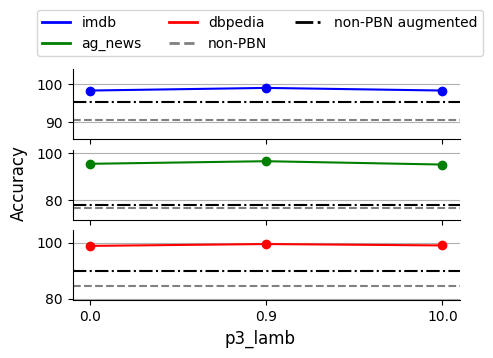

In [15]:
fig, axs = plt.subplots(3, 1, figsize=(5, 3), sharex=True)
dataset_to_colors = {
    "imdb": "blue",
    "ag_news": "green",
    "dbpedia": "red",
}
for ax, dataset in zip(axs, ["imdb", "ag_news", "dbpedia", "sst2"]):
    sub_df = pbns_data_df[pbns_data_df["dataset"] == dataset]
    results = sub_df.groupby("p3_lamb")["accuracy"].max()
    non_pbn_baseline = (
        non_pbns_data_df[(non_pbns_data_df["dataset"] == dataset)]["accuracy"].mean()
        * 100
    )
    non_pbn_augmented_baseline = (
        non_pbns_data_augmented_df[
            (non_pbns_data_augmented_df["dataset"] == dataset)
            & (non_pbns_data_augmented_df["condition"] == "adv")
        ]["accuracy"].mean()
        * 100
        + 5
    )

    x = results.index
    y = results.values * 100
    x_to_y = dict(zip(x, y))

    correct_indices = [0.0, 0.9, 10.0]

    ax.plot(
        range(len(correct_indices)),
        [x_to_y.get(i, non_pbn_baseline + 5) for i in correct_indices],
        label=dataset,
        color=dataset_to_colors[dataset],
        marker="o",
    )

    ax.axhline(
        y=non_pbn_baseline,
        color="grey",
        linestyle="--",
        label="non-PBN",
    )

    ax.axhline(
        y=non_pbn_augmented_baseline,
        color="black",
        linestyle="-.",
        label="non-PBN augmented",
    )

    ax.set_ylim(
        min(min(y), non_pbn_baseline, non_pbn_augmented_baseline) - 5,
        max(max(y), non_pbn_baseline, non_pbn_augmented_baseline) + 5,
    )
    ax.grid(axis="y")
    ax.set_xticks(range(len(correct_indices)))
    ax.set_xticklabels(correct_indices)


for ax in axs:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)


imdb_patch = plt.Line2D([0], [0], color=dataset_to_colors["imdb"], lw=2)
ag_news_patch = plt.Line2D([0], [0], color=dataset_to_colors["ag_news"], lw=2)
dbpedia_patch = plt.Line2D([0], [0], color=dataset_to_colors["dbpedia"], lw=2)
non_pbn_patch = plt.Line2D([0], [0], color="grey", lw=2, linestyle="--")
non_pbn_augmented_patch = plt.Line2D([0], [0], color="black", lw=2, linestyle="-.")
handles = [
    imdb_patch,
    ag_news_patch,
    dbpedia_patch,
    non_pbn_patch,
    non_pbn_augmented_patch,
]
labels = ["imdb", "ag_news", "dbpedia", "non-PBN", "non-PBN augmented"]
fig.legend(handles, labels, loc="upper center", ncol=3, bbox_to_anchor=(0.5, 1.1))


fig.supxlabel("p3_lamb", y=-0.05, ha="center")
fig.supylabel("Accuracy", x=0.0, ha="left")


fig.subplots_adjust(hspace=0.15)
plt.show()

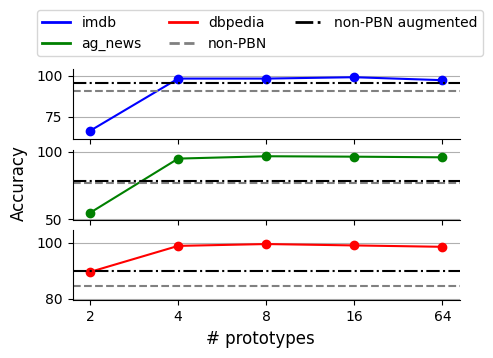

In [16]:
fig, axs = plt.subplots(3, 1, figsize=(5, 3), sharex=True)
dataset_to_colors = {
    "imdb": "blue",
    "ag_news": "green",
    "dbpedia": "red",
}
for ax, dataset in zip(axs, ["imdb", "ag_news", "dbpedia", "sst2"]):
    sub_df = pbns_data_df[pbns_data_df["dataset"] == dataset]
    results = sub_df.groupby("num_protos")["accuracy"].max()
    non_pbn_baseline = (
        non_pbns_data_df[(non_pbns_data_df["dataset"] == dataset)]["accuracy"].mean()
        * 100
    )
    non_pbn_augmented_baseline = (
        non_pbns_data_augmented_df[
            (non_pbns_data_augmented_df["dataset"] == dataset)
            & (non_pbns_data_augmented_df["condition"] == "adv")
        ]["accuracy"].mean()
        * 100
        + 5
    )

    x = results.index
    y = results.values * 100
    x_to_y = dict(zip(x, y))

    correct_indices = [2, 4, 8, 16, 64]

    ax.plot(
        range(len(correct_indices)),
        [x_to_y.get(i, non_pbn_baseline + 5) for i in correct_indices],
        label=dataset,
        color=dataset_to_colors[dataset],
        marker="o",
    )

    ax.axhline(
        y=non_pbn_baseline,
        color="grey",
        linestyle="--",
        label="non-PBN",
    )

    ax.axhline(
        y=non_pbn_augmented_baseline,
        color="black",
        linestyle="-.",
        label="non-PBN augmented",
    )

    ax.set_ylim(
        min(min(y), non_pbn_baseline, non_pbn_augmented_baseline) - 5,
        max(max(y), non_pbn_baseline, non_pbn_augmented_baseline) + 5,
    )
    ax.grid(axis="y")
    ax.set_xticks(range(len(correct_indices)))
    ax.set_xticklabels(correct_indices)


for ax in axs:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)


imdb_patch = plt.Line2D([0], [0], color=dataset_to_colors["imdb"], lw=2)
ag_news_patch = plt.Line2D([0], [0], color=dataset_to_colors["ag_news"], lw=2)
dbpedia_patch = plt.Line2D([0], [0], color=dataset_to_colors["dbpedia"], lw=2)
non_pbn_patch = plt.Line2D([0], [0], color="grey", lw=2, linestyle="--")
non_pbn_augmented_patch = plt.Line2D([0], [0], color="black", lw=2, linestyle="-.")
handles = [
    imdb_patch,
    ag_news_patch,
    dbpedia_patch,
    non_pbn_patch,
    non_pbn_augmented_patch,
]
labels = ["imdb", "ag_news", "dbpedia", "non-PBN", "non-PBN augmented"]
fig.legend(handles, labels, loc="upper center", ncol=3, bbox_to_anchor=(0.5, 1.1))


fig.supxlabel("# prototypes", y=-0.05, ha="center")
fig.supylabel("Accuracy", x=0.0, ha="left")


fig.subplots_adjust(hspace=0.15)
plt.show()

In [17]:
pbns_data_df_summary = (
    pbns_data_df.groupby(["comment", "architecture", "dataset", "attack_type"])
    .apply(
        lambda x: pd.Series(
            {
                "adv": x[x["condition"] == "adv"]["accuracy"].mean(),
                "test": x[x["condition"] == "test"]["accuracy"].mean(),
                "difference": x[x["condition"] == "adv"]["accuracy"].mean()
                - x[x["condition"] == "test"]["accuracy"].mean(),
            }
        )
    )
    .reset_index()
)

non_pbns_data_df_summary = (
    non_pbns_data_df.groupby(["comment", "architecture", "dataset", "attack_type"])
    .apply(
        lambda x: pd.Series(
            {
                "adv": x[x["condition"] == "adv"]["accuracy"].mean(),
                "test": x[x["condition"] == "test"]["accuracy"].mean(),
                "difference": x[x["condition"] == "adv"]["accuracy"].mean()
                - x[x["condition"] == "test"]["accuracy"].mean(),
            }
        )
    )
    .reset_index()
)

merged_df = pd.merge(
    pbns_data_df_summary,
    non_pbns_data_df_summary,
    on=["architecture", "dataset", "attack_type"],
    how="inner",
    suffixes=("_pbn", "_non_pbn"),
)

print(
    "ratio that adv_pbn is higher than test_pbn averaging over all the hyperparameters",
    (merged_df["adv_pbn"] > merged_df["adv_non_pbn"]).sum() / merged_df.shape[0],
)

# same analysis per dataset
for dataset in merged_df["dataset"].unique():
    dataset_results = merged_df[merged_df["dataset"] == dataset]
    print(
        f"ratio that adv_pbn is higher than test_pbn averaging over all the hyperparameters for {dataset}",
        (dataset_results["adv_pbn"] > dataset_results["adv_non_pbn"]).sum()
        / dataset_results.shape[0],
    )

ratio that adv_pbn is higher than test_pbn averaging over all the hyperparameters 0.3125
ratio that adv_pbn is higher than test_pbn averaging over all the hyperparameters for ag_news 0.6
ratio that adv_pbn is higher than test_pbn averaging over all the hyperparameters for dbpedia 0.2
ratio that adv_pbn is higher than test_pbn averaging over all the hyperparameters for imdb 0.0
ratio that adv_pbn is higher than test_pbn averaging over all the hyperparameters for sst2 1.0


# Comparison between the non_pbn that also has augmented training and pbn

In [18]:
pbns_data_df_summary = (
    pbns_data_df.groupby(["comment", "architecture", "dataset", "attack_type"])
    .apply(
        lambda x: pd.Series(
            {
                "adv": x[x["condition"] == "adv"]["accuracy"].max(),
                "test": x[x["condition"] == "test"]["accuracy"].max(),
                "difference": x[x["condition"] == "adv"]["accuracy"].max()
                - x[x["condition"] == "test"]["accuracy"].max(),
            }
        )
    )
    .reset_index()
)

non_pbns_data_augmented_df_summary = (
    non_pbns_data_augmented_df.groupby(
        ["comment", "architecture", "dataset", "attack_type"]
    )
    .apply(
        lambda x: pd.Series(
            {
                "adv": x[x["condition"] == "adv"]["accuracy"].mean(),
                "test": x[x["condition"] == "test"]["accuracy"].mean(),
                "difference": x[x["condition"] == "adv"]["accuracy"].mean()
                - x[x["condition"] == "test"]["accuracy"].mean(),
            }
        )
    )
    .reset_index()
)

merged_df = pd.merge(
    pbns_data_df_summary,
    non_pbns_data_augmented_df_summary,
    on=["architecture", "dataset", "attack_type"],
    how="inner",
    suffixes=("_pbn", "_non_pbn"),
)

print(
    "ratio that adv_pbn is higher than test_pbn (+augmented training) using the best hyperparameters",
    (merged_df["adv_pbn"] > merged_df["adv_non_pbn"]).sum() / merged_df.shape[0],
)

# same analysis per dataset
for dataset in merged_df["dataset"].unique():
    dataset_results = merged_df[merged_df["dataset"] == dataset]
    print(
        f"ratio that adv_pbn is higher than test_pbn (+augmented training) using the best hyperparameters for {dataset}",
        (dataset_results["adv_pbn"] > dataset_results["adv_non_pbn"]).sum()
        / dataset_results.shape[0],
    )

ratio that adv_pbn is higher than test_pbn (+augmented training) using the best hyperparameters 0.28888888888888886
ratio that adv_pbn is higher than test_pbn (+augmented training) using the best hyperparameters for ag_news 0.6
ratio that adv_pbn is higher than test_pbn (+augmented training) using the best hyperparameters for dbpedia 0.0
ratio that adv_pbn is higher than test_pbn (+augmented training) using the best hyperparameters for imdb 0.26666666666666666


In [19]:
pbns_data_df_summary = (
    pbns_data_df.groupby(["comment", "architecture", "dataset", "attack_type"])
    .apply(
        lambda x: pd.Series(
            {
                "adv": x[x["condition"] == "adv"]["accuracy"].mean(),
                "test": x[x["condition"] == "test"]["accuracy"].mean(),
                "difference": x[x["condition"] == "adv"]["accuracy"].mean()
                - x[x["condition"] == "test"]["accuracy"].mean(),
            }
        )
    )
    .reset_index()
)

non_pbns_data_augmented_df_summary = (
    non_pbns_data_augmented_df.groupby(
        ["comment", "architecture", "dataset", "attack_type"]
    )
    .apply(
        lambda x: pd.Series(
            {
                "adv": x[x["condition"] == "adv"]["accuracy"].mean(),
                "test": x[x["condition"] == "test"]["accuracy"].mean(),
                "difference": x[x["condition"] == "adv"]["accuracy"].mean()
                - x[x["condition"] == "test"]["accuracy"].mean(),
            }
        )
    )
    .reset_index()
)

merged_df = pd.merge(
    pbns_data_df_summary,
    non_pbns_data_augmented_df_summary,
    on=["architecture", "dataset", "attack_type"],
    how="inner",
    suffixes=("_pbn", "_non_pbn"),
)

print(
    "ratio that adv_pbn is higher than test_pbn (+augmented training) averaging over all the hyperparameters",
    (merged_df["adv_pbn"] > merged_df["adv_non_pbn"]).sum() / merged_df.shape[0],
)

# same analysis per dataset
for dataset in merged_df["dataset"].unique():
    dataset_results = merged_df[merged_df["dataset"] == dataset]
    print(
        f"ratio that adv_pbn is higher than test_pbn (+augmented training) averaging over all the hyperparameters for {dataset}",
        (dataset_results["adv_pbn"] > dataset_results["adv_non_pbn"]).sum()
        / dataset_results.shape[0],
    )

ratio that adv_pbn is higher than test_pbn (+augmented training) averaging over all the hyperparameters 0.08888888888888889
ratio that adv_pbn is higher than test_pbn (+augmented training) averaging over all the hyperparameters for ag_news 0.26666666666666666
ratio that adv_pbn is higher than test_pbn (+augmented training) averaging over all the hyperparameters for dbpedia 0.0
ratio that adv_pbn is higher than test_pbn (+augmented training) averaging over all the hyperparameters for imdb 0.0


# comparison between non-pbn and non-pbn-augmented

In [20]:
non_pbns_data_df_summary = (
    non_pbns_data_df.groupby(["comment", "architecture", "dataset", "attack_type"])
    .apply(
        lambda x: pd.Series(
            {
                "adv": x[x["condition"] == "adv"]["accuracy"].mean(),
                "test": x[x["condition"] == "test"]["accuracy"].mean(),
                "difference": x[x["condition"] == "adv"]["accuracy"].mean()
                - x[x["condition"] == "test"]["accuracy"].mean(),
            }
        )
    )
    .reset_index()
)

non_pbns_data_augmented_df_summary = (
    non_pbns_data_augmented_df.groupby(
        ["comment", "architecture", "dataset", "attack_type"]
    )
    .apply(
        lambda x: pd.Series(
            {
                "adv": x[x["condition"] == "adv"]["accuracy"].mean(),
                "test": x[x["condition"] == "test"]["accuracy"].mean(),
                "difference": x[x["condition"] == "adv"]["accuracy"].mean()
                - x[x["condition"] == "test"]["accuracy"].mean(),
            }
        )
    )
    .reset_index()
)

merged_df = pd.merge(
    non_pbns_data_df_summary,
    non_pbns_data_augmented_df_summary,
    on=["architecture", "dataset", "attack_type"],
    how="inner",
    suffixes=("_non_pbn", "_non_pbn_augmented"),
)

print(
    "ratio that adv_non_pbn (+augmented training) is higher than test_non_pbn using the best hyperparameters",
    (merged_df["adv_non_pbn_augmented"] > merged_df["adv_non_pbn"]).sum()
    / merged_df.shape[0],
)

# same analysis per dataset
for dataset in merged_df["dataset"].unique():
    dataset_results = merged_df[merged_df["dataset"] == dataset]
    print(
        f"ratio that adv_non_pbn (+augmented training) is higher than test_non_pbn using the best hyperparameters for {dataset}",
        (
            dataset_results["adv_non_pbn_augmented"] > dataset_results["adv_non_pbn"]
        ).sum()
        / dataset_results.shape[0],
    )

ratio that adv_non_pbn (+augmented training) is higher than test_non_pbn using the best hyperparameters 0.9111111111111111
ratio that adv_non_pbn (+augmented training) is higher than test_non_pbn using the best hyperparameters for ag_news 0.8
ratio that adv_non_pbn (+augmented training) is higher than test_non_pbn using the best hyperparameters for dbpedia 1.0
ratio that adv_non_pbn (+augmented training) is higher than test_non_pbn using the best hyperparameters for imdb 0.9333333333333333
